## Regression Task: Predicting the Price of the house for King county

### Dataset Link

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression/data

#### Features description:
#### The dataset consist of total 21 features price : The price of the house(This the Target variable which we have to predict)
- id : Unique value for each record
- date : when the property was bought/sold
- bedrooms : Number of bedroom in the house
- bathrooms : Number of bathroom in the house
- sqft_living : Living area
- sqft_lot : What is the lot size of the house
- floors : How many floor is in the house
- waterfront : Does it has any waterfront(0/1) 
- view : View the house has( which is zero and hence this variable does not contribute to the prediction
- condition : what is the condition of the house when the house was bought
- grade : The house are graded taking into consideration different parameter
- sqft_above : what is the area of the above portion of the house
- sqft_basement:what is the area of the basement
- yr_built : When the house was built
- yr_renovated: when the house was renovated
- zipcode : Zipcode
- lat : Latitude of the house it is located
- long : Longitude of the house it is located
- sqft_living15: Area of the living area if it has anymore in total
- sqft_lot15 : Area of the lot provided with the house 

### Objective:
* We use various regression methods and try to predict the house prices by using different features which contribute to the prediction of the house price.
* As we know we have different methods to get the solution but we need to find the best solution among the various method because each method has pros and cons. 
* Once after visualizing some features and a data mining process. we tried to find the best regression model for this dataset.

### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt
#import mglearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

### Importing Dataset

In [6]:
housing_dataset = pd.read_csv('house_data.csv')

In [7]:
housing_dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
housing_dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# We can see that for 'bedrooms	bathrooms	waterfront	view	yr_renovated' are having majority of the values as zero.
housing_dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Changing the date format:

In [11]:
# Trimming the date column and replacing with the correct date format.
housing_dataset['date'] = housing_dataset['date'].str.replace('T000000',"")
housing_dataset['date'] = pd.to_datetime(housing_dataset['date'], format='%Y%m%d')

In [12]:
### Changed the date Format
housing_dataset.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


#### As we can see that the number of record having Zero in the view,waterfront, yr_renovated column is 19489,21450, 20699 out of 21613 which do not seems to be the driving feature in predicting the price of the house.If we want we can drop this feature but we will keep as such.

In [13]:
print("No of missing value in View column : " +str((housing_dataset['view']==0).sum()))
print("No of missing value in waterfront column : " +str((housing_dataset['waterfront']==0).sum()))
print("No of missing value in yr_renovated column : " +str((housing_dataset['yr_renovated']==0).sum()))

No of missing value in View column : 19489
No of missing value in waterfront column : 21450
No of missing value in yr_renovated column : 20699


### Missing Values: 
* As we can see that the date column is not properly defined so we need to correct the date column of the dataset. Also we can see that the dataset containing lot of 0( Zero) which indicate that the data is missing for that column or dataset do not contain the correct value.
* when trying to check for missing value we came to see that no column has the missing value because the values are filled with zero(0) which is not termed as missing value.

In [46]:
Missing_Values_Housing=(housing_dataset.isna().sum(axis=0))
Missing_Values_Housing

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [47]:
#number of features and instances
housing_dataset.shape

(21613, 21)

## Visualizing and understanding Data

Under standing the correlation between the important dataset which can mainly effect the price of the house.

#### It can be seen that the there is a linear relationship between Target variable - Price with sqft_above and sqft_living

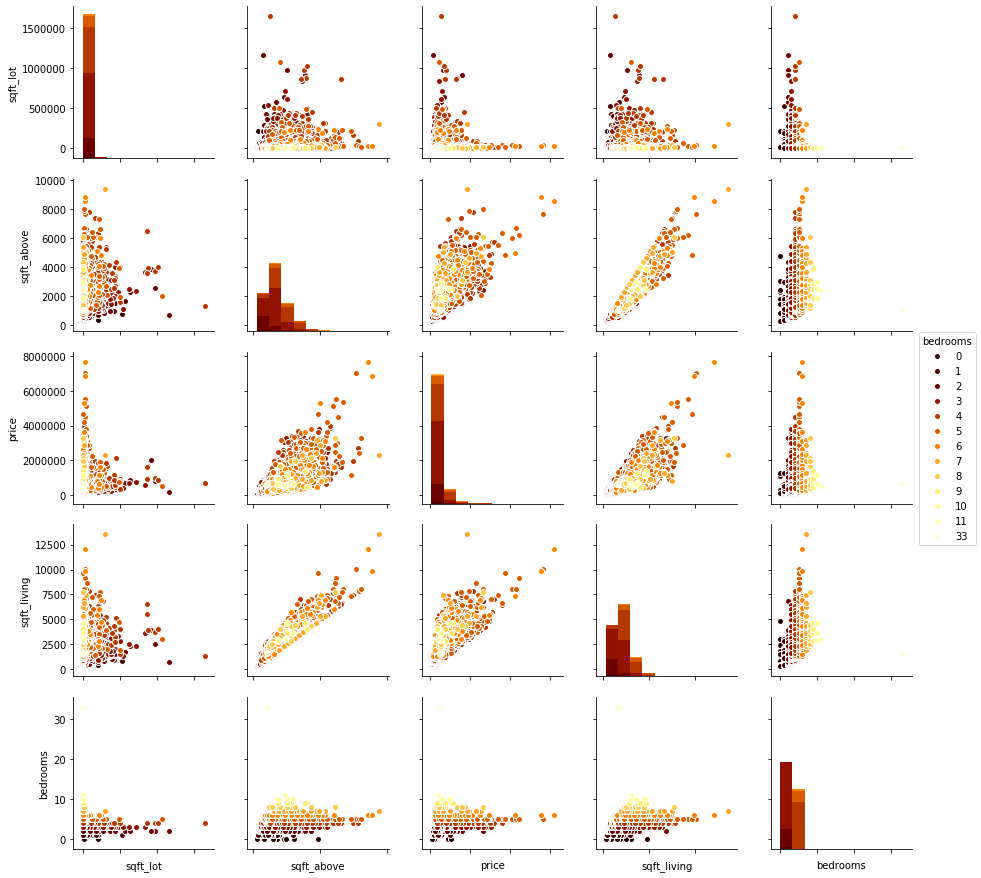

In [48]:
p = sns.pairplot(housing_dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='afmhot')
p.set(xticklabels=[])

In [49]:
dataset_df=housing_dataset[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]

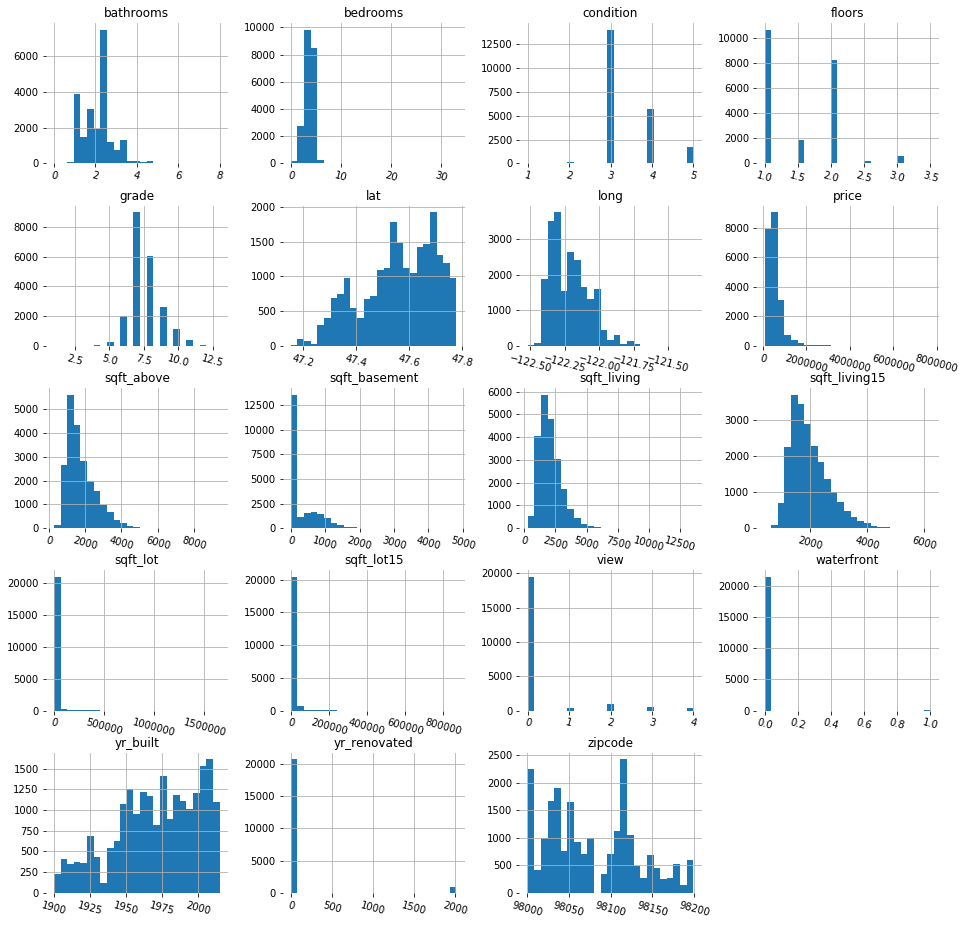

In [50]:
histogram_dataset = dataset_df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)

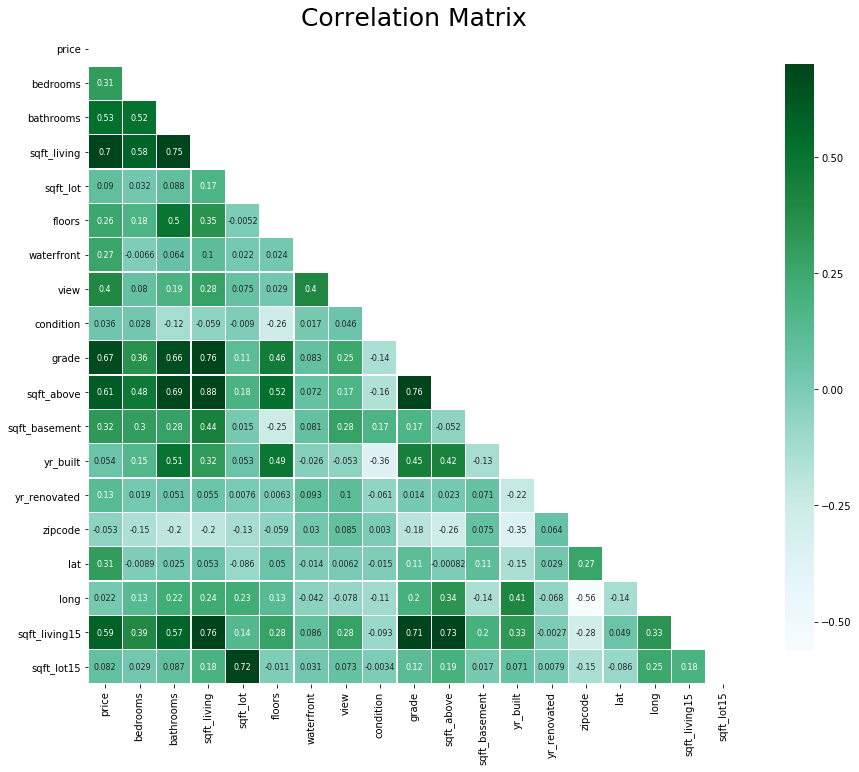

In [51]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(housing_dataset[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(housing_dataset[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

### The no of Bedrooms,Grade,sqft_living,sqft above has a highest correlation with the target variable price

### Age of the House and price comparision:

As we know that the age of the house also play the vital role in predicting the price of the house so we will create few more columns which will tell us how old is the house. For that we are Converting the yr_built to the diffrent bins which will reduce the effects of minor observation errors but it will increase the number of column.calculating the number of years the houses were built. We can observe this in the below histograms.

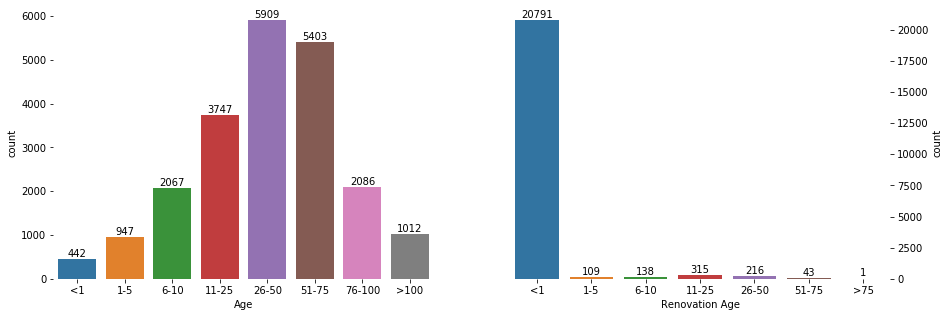

In [52]:
# just take the year from the date column
housing_dataset['sales_yr'] = housing_dataset['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
housing_dataset['age']=housing_dataset['sales_yr'].astype(int)-housing_dataset['yr_built']
# add the age of the renovation when the houses were sold as a new column
housing_dataset['age_rnv']=0
housing_dataset['age_rnv']=housing_dataset['sales_yr'][housing_dataset['yr_renovated']!=0].astype(int)-housing_dataset['yr_renovated'][housing_dataset['yr_renovated']!=0]
housing_dataset['age_rnv'][housing_dataset['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
housing_dataset['age_binned'] = pd.cut(housing_dataset['age'], bins=bins, labels=labels)

# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
housing_dataset['age_rnv_binned'] = pd.cut(housing_dataset['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(housing_dataset['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(housing_dataset['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
housing_dataset = pd.get_dummies(housing_dataset, columns=['age_binned','age_rnv_binned'])

#### From the above graph it is clear that the there are 20791 houses that are renovated in less than a year.So the prices of those houses will be higher than the old houses

In [53]:
housing_dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sales_yr', 'age',
       'age_rnv', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75'],
      dtype='object')

In [54]:
# now after converting the age of the house in different categories our feature go increased to 39.
housing_dataset.shape

(21613, 39)

In [55]:
# now after converting the age of the house in different categories our feature go increased to 39.
housing_dataset.shape

(21613, 39)

In [56]:
housing_dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [57]:
# we are taking only the relevant feature which is relevant and constitue in the pice value of the house.
x_feature = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
y_feature= ['price']

In [58]:
X = housing_dataset[x_feature]
y = housing_dataset[y_feature]

In [59]:
X.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,98125,47.7210,-122.319,1690,7639


In [61]:
y.head(2)

,price
0,221900.0
1,538000.0


## Train-Test split:

In [62]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Scaling:
* MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Regression Models:
* Linear Regression
* Ridge Regression
* Lasso Regression
* KNN Regressor
* Polynomial Regression
* Linear SVR
* Kernalized SVR -Linear
* Kernalized SVR - RBF
* Kernalized SVR - Poly

### Linear Regression:

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('Train Score: %.4f'%lreg.score(X_train, y_train))
print('Test Score: %.4f'%lreg.score(X_test, y_test))

train_score=round(lreg.score(X_train, y_train),2)
test_score=round(lreg.score(X_test, y_test),2)

for i in range(2,10):
    Best_score = cross_val_score(lreg,X_train,y_train,cv=i)
    Best_score = Best_score.mean()
    print(" Best score with CV = {} : {}".format(i,Best_score))

Train Score: 0.7003
Test Score: -15979438724110747648.0000
 Best score with CV = 2 : 0.7018937479929763
 Best score with CV = 3 : 0.7026058739009254
 Best score with CV = 4 : 0.6762621835247171
 Best score with CV = 5 : 0.6889393885137773
 Best score with CV = 6 : 0.6941905472691728
 Best score with CV = 7 : 0.6985963379917306
 Best score with CV = 8 : 0.7004965009278478
 Best score with CV = 9 : 0.6974453659720333


### From the above result the model is overfitting since the test score is negative and the training score is around 0.70

Text(0.5, 0, 'Area of the House')

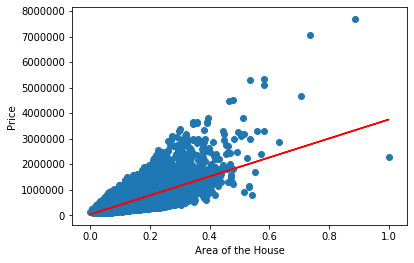

In [68]:
#### Comparing Area of the house to the price of the house
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.ylabel('Price')
plt.xlabel('Area of the House')

### From the graph it is clear that Area of the house and price are linearly related

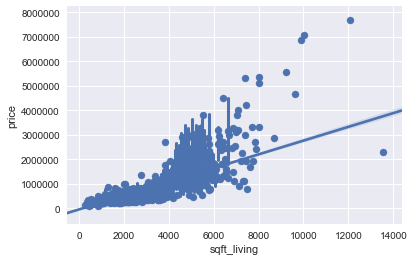

In [70]:
import seaborn as sns
sns.set(color_codes=True)
sns.regplot(x='sqft_living', y="price", data=housing_dataset,x_estimator=np.mean);

### The Living area of the house also is in linear relationship with the price of the house

### Writing the result to the csv

In [71]:
f = open('result-house_price.csv','w')
line = '------------------------------------Regression-------------------------------------\n\n'
line = 'Model name, Best Parameters, Train Score, Test Score, Best Cross-Validation score\n'
f.write(line)
f.close()

In [72]:
f = open('result-house_price.csv','a')
line = 'Linear Regression,' + str()+',' + str(train_score) + ',' + str(test_score) + ','+ str(Best_score)+'\n'
f.write(line)
f.close()

## Ridge Regression:

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [105]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}


In [106]:
grid_search_Ridge = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search_Ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [107]:
print("Best parameters: {}".format(grid_search_Ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_Ridge.best_score_))

Best_param_Ridge =format(grid_search_Ridge.best_params_)
Best_score_Ridge = format(grid_search_Ridge.best_score_)

Best parameters: {'alpha': 1}
Best cross-validation score: 0.70


In [108]:
x_range = [ 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

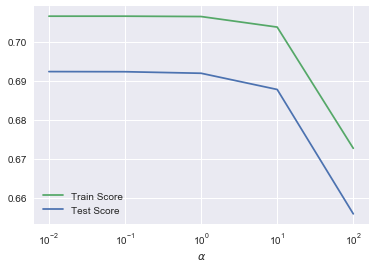

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [110]:
print('The Training score is:{}'.format(train_score_list))
print('The Test score is: {}'.format(test_score_list))

The Training score is:[0.7064890518088824, 0.7064879030028991, 0.7063971557641818, 0.7036979853292379, 0.6726915464211387]
The Test score is: [0.6923130629175771, 0.6922790786572124, 0.6918876188475127, 0.6877410388854643, 0.655925313656775]


### Running the ridge regression using best parameters:

In [111]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.7064
Test score: 0.6919


In [112]:
train_score_ridge=ridge.score(X_train,y_train)
test_score_ridge=ridge.score(X_test, y_test)

In [113]:
### From applying ridge regression one feature has been moved to zero which means the feature is not important
ridge.coef_

array([[-867690.17155835,  225740.00260138,  844588.09429335,
         244201.75111587,  -20849.6062848 ,  615741.34414541,
         210310.89969175,  135848.14734713, 1119315.43242404,
        1004951.0296466 ,  420257.02469077,  -38918.5865333 ,
         -45130.17322687,  -63094.64687496,  -85228.45589042,
         -62363.45817432,   31981.54080004,  118164.52604426,
         144589.25385684,  -26157.0672333 ,   84966.26947527,
          73220.08698208,   52140.12987974,  -31058.62434857,
        -153110.79475505,       0.        , -123653.4251765 ,
         380490.92653641, -252853.63846602,  179265.80092408,
        -237120.5864709 ]])

### Appending the results to the csv File

In [115]:
f = open('result-house_price.csv','a')
line = 'Ridge Regression,' + str(Best_param_Ridge)+',' + str(train_score_ridge) + ',' + str(test_score_ridge) + ','+ str(Best_score_Ridge)+'\n'
f.write(line)
f.close()

### Ridge Result:
* The Train,Test and CV scores are very close and the Ridge regresssion model is generalizing well

## Lasso Regression:

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [117]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


In [118]:
grid_search_Lasso = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search_Lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [125]:
print("Best parameters: {}".format(grid_search_Lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_Lasso.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.70


In [126]:
from sklearn.linear_model import Lasso
Xrange = [0.01, 0.1, 1, 10, 100]
train_score_list_lasso = []
test_score_list_lasso = []

for alpha in Xrange: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list_lasso.append(lasso.score(X_train,y_train))
    test_score_list_lasso.append(lasso.score(X_test, y_test))

In [127]:
print('The Training score is:{}'.format(train_score_list_lasso))
print('The Test score is:{}'.format(test_score_list_lasso ))

The Training score is:[0.706489063714743, 0.7064890626202925, 0.7064889531752514, 0.7064784520664544, 0.7057916145003785]
The Test score is:[0.6923089311118733, 0.6923088013259432, 0.6923074039547309, 0.6922743996201595, 0.6911267213248093]


Text(0.5, 0, '$\\alpha$')

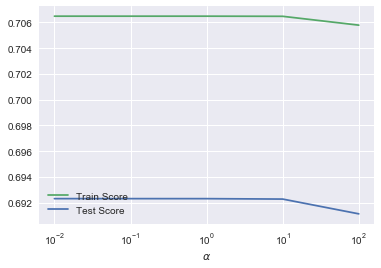

In [128]:
plt.plot(Xrange, train_score_list_lasso, c = 'g', label = 'Train Score')
plt.plot(Xrange, test_score_list_lasso, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Running Lasso on the best parameter selected

In [130]:
Best_param_Lasso =format(grid_search_Lasso.best_params_)
Best_score_Lasso = format(grid_search_Lasso.best_score_)

lasso_best=Lasso(alpha=10)
lasso_best.fit(X_train,y_train)
train_score_lasso=round(lasso_best.score(X_train, y_train),2)
test_score_lasso=round(lasso_best.score(X_test, y_test),2)
print('Train score:{}'.format(train_score_lasso))
print('Test score:{}'.format(test_score_lasso))

Train score:0.71
Test score:0.69


In [131]:
f = open('result-house_price.csv','a')
line = 'Lasso Regression,' + str(Best_param_Lasso)+',' + str(train_score_lasso) + ',' + str(test_score_lasso) + ','+ str(Best_score_Lasso)+'\n'
f.write(line)
f.close()

#### Lasso Result:
* As per above graph The parameter tuning for Lasso does not change the train and test scores i.e) for different values of alpha the scores are almost the same
* The Train,Test and CV scores are very close and the Lasso regresssion model is generalizing well

### KNN Regressor

In [132]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [133]:
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}


In [134]:
knn = neighbors.KNeighborsRegressor()
grid_Knn = GridSearchCV(knn, param_grid, cv=5)
# fit the grid with data
grid_Knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [136]:
print('KNN best score:{}'.format(grid_Knn.best_score_))
print('KNN best parameter:{}'.format(grid_Knn.best_params_))

KNN best score:0.7194690263145795
KNN best parameter:{'n_neighbors': 4}


In [137]:
test=[]
train=[]

for k in range(1,15):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    train.append(knn.score(X_train, y_train))
    test.append(knn.score(X_test, y_test))

In [138]:
print("Train Score:{}".format(train))
print("Test Score:{}".format(test))

Train Score:[0.9985201877125437, 0.9157987984124377, 0.8760602797570036, 0.8483364350286453, 0.8273687510820867, 0.8108692677250698, 0.7966836786631557, 0.785413101747894, 0.7790743612618648, 0.7706868846734737, 0.7624040898359694, 0.7553847742098965, 0.7483150728419646, 0.7436837242126595]
Test Score:[0.6447872463770623, 0.7090971033548779, 0.7223129971519071, 0.7173120659390229, 0.7165901107783658, 0.7190941343345166, 0.713400804594457, 0.7086528158250383, 0.7074567646791645, 0.7047875236631769, 0.700606492449955, 0.6948581837790646, 0.6894177525879781, 0.6844298299197034]


Text(0, 0.5, 'Score')

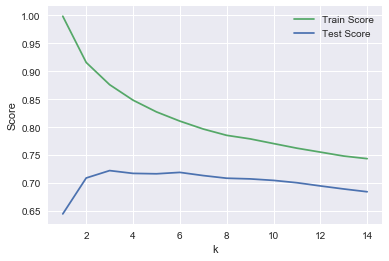

In [139]:
#Graph
x_axis = range(1,15)
plt.plot(x_axis, train, c = 'g', label = 'Train Score')
plt.plot(x_axis, test, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Score')

### Running KNN on selected Parameter:

In [142]:
Best_param_knn =format(grid_Knn.best_params_)
Best_score_knn = format(grid_Knn.best_score_)

knn_best=KNeighborsRegressor(n_neighbors =4)
knn_best.fit(X_train,y_train)
train_score_knn=round(knn_best.score(X_train, y_train),2)
test_score_knn=round(knn_best.score(X_test, y_test),2)

In [143]:
print("Train Score for K=4:{}".format(train_score_knn))
print("Test Score for K=4:{}".format(test_score_knn))

Train Score for K=4:0.85
Test Score for K=4:0.72


### Writing Results to the CSV file

In [144]:
f = open('result-house_price.csv','a')
line = 'Kneighbours Regression,' + str(Best_param_knn)+',' + str(train_score_knn) + ',' + str(test_score_knn) + ','+ str(Best_score_knn)+'\n'
f.write(line)
f.close()

### KNN Result:
* The KNN with best Parameter K=4 overfits the data

## Polynomial Regression:

In [147]:
from  sklearn.preprocessing  import PolynomialFeatures

Text(0, 0.5, 'Price')

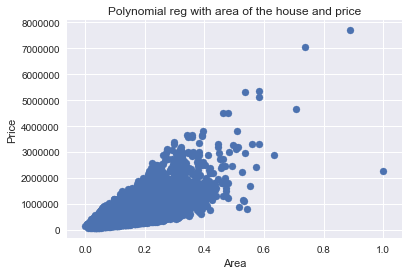

In [151]:
X_train_p = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_p,y_train)
plt.title('Polynomial reg with area of the house and price')
plt.xlabel('Area')
plt.ylabel('Price')

In [148]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [149]:
print('Train Score list:{}'.format(train_score_list))
print('Test score list:{}'.format(test_score_list))

Train Score list:[0.7064286004875184, 0.8436886372602114]
Test score list:[-1.3543248683301116e+21, -1.28052791070611e+20]


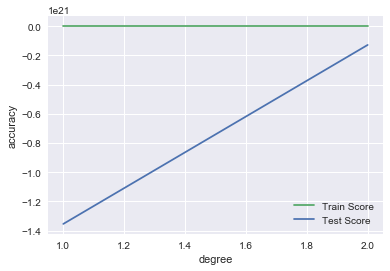

In [152]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

### The polynomial Regression with all the features is overfitting the data. Hence trying it on Area of the house

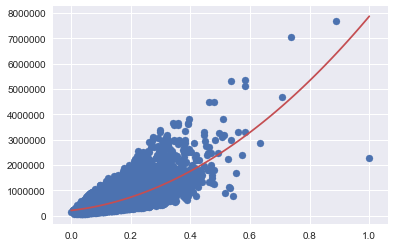

In [154]:
#### Area with price for polynomial regression
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_p)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_p = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_p,y_train)
plt.plot(x_axis, y_predict, c = 'r')

### Polynomial result:
* From the above graph with only area of the graph for a degree 2 polynomial we can fit a curve for this dataset
* Wheras with all the features it is clearly overfitting the data

## Linear SVR:

In [159]:
from sklearn.svm import LinearSVR

In [164]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000,10000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}


In [165]:
grid_search_Linearsvr = GridSearchCV(LinearSVR(), param_grid, cv=5, return_train_score=True)
grid_search_Linearsvr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [166]:
print("Best parameters: {}".format(grid_search_Linearsvr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_Linearsvr.best_score_))

Best parameters: {'C': 10000}
Best cross-validation score: 0.63


In [197]:
train_Linear_svr = []
test_Linear_svr = []

for C in [0.1, 1, 10, 100, 1000, 10000]:
    #create the model
    svr = LinearSVR(C=C)
    svr.fit(X_train, y_train)
    #evaluate the model
    train_Linear_svr.append(svr.score(X_train, y_train))
    test_Linear_svr.append(svr.score(X_test, y_test))

In [198]:
print("Train Score for diff C:{}".format(train_Linear_svr))
print("Test Score for diff C:{}".format(test_Linear_svr))

Train Score for diff C:[-2.119143626849662, -1.7081025636656135, -0.27382246515004605, 0.16020307145933535, 0.518912098137716, 0.6339647734770677]
Test Score for diff C:[-2.106733706380802, -1.6925153726308073, -0.25633281059466273, 0.16747973129844063, 0.5117585714021627, 0.6206639965673639]


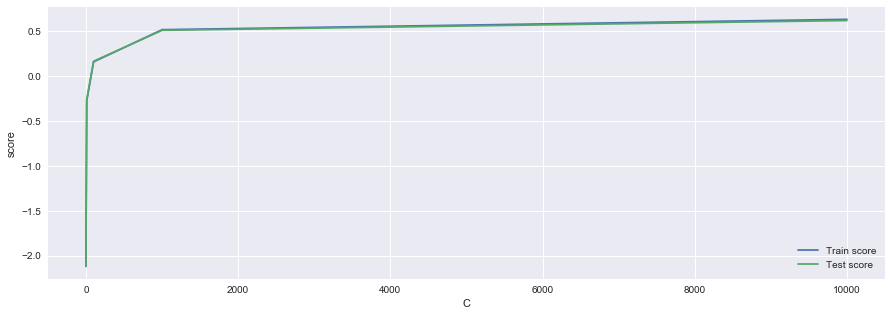

In [199]:
fig, ax = plt.subplots(figsize = (15,5))
x_axis=[0.1, 1, 10, 100, 1000, 10000]
plt.plot(x_axis, train_Linear_svr, label = 'Train score')
plt.plot(x_axis, test_Linear_svr, label = 'Test score')
plt.grid(True)
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
#plt.xticks(range(len(index_svr)), index_svr, rotation = 90)
plt.show()

### Running using Best parameters:

In [200]:
Best_param_LinearSVR =format(grid_search_Linearsvr.best_params_)
Best_score_LinearSVR = format(grid_search_Linearsvr.best_score_)

linearSVC_best=LinearSVR(C =10000)
linearSVC_best.fit(X_train,y_train)
train_score_SVR=round(linearSVC_best.score(X_train, y_train),2)
test_score_SVR=round(linearSVC_best.score(X_test, y_test),2)

In [201]:
print("Train Score with best parameter:{}".format(train_score_SVR))
print("Test Score with best parameter:{}".format(test_score_SVR))

Train Score with best parameter:0.63
Test Score with best parameter:0.62


### Writing the results to the file

In [170]:
f = open('result-house_price.csv','a')
line = 'LinearSVR ,' + str(Best_param_LinearSVR)+',' + str(train_score_SVR) + ',' + str(test_score_SVR) + ','+ str(Best_score_LinearSVR)+'\n'
f.write(line)
f.close()

### LinearSVR Results:
* Eventhough the Train, Test and CV scores are low. The LinearSVR with best parameter is generalizing well

## SVR Linear Kernel

In [173]:
from sklearn.svm import SVR

In [174]:
param_grid = {'C': [ 0.1, 1, 10, 100, 1000, 10000]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10, 100, 1000, 10000]}


In [176]:
grid_search_LinearKer = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, return_train_score=True)
grid_search_LinearKer.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [177]:
print("Best parameters: {}".format(grid_search_LinearKer.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_LinearKer.best_score_))

Best parameters: {'C': 10000}
Best cross-validation score: 0.63


In [191]:
from sklearn.svm import SVR
train_svr_Linear = []
test_svr_Linear = []

for C in [0.1, 1, 10, 100, 1000, 10000]:
    #create the model
    svr = SVR(kernel = 'linear', C = C)
    svr.fit(X_train, y_train)
    #evaluate the model
    train_svr_Linear.append(svr.score(X_train, y_train))
    test_svr_Linear.append(svr.score(X_test, y_test))

In [193]:
print("Train Score for diff C:{}".format(train_svr_Linear))
print("Test Score for diff C:{}".format(test_svr_Linear))

Train Score for diff C:[-0.05837280715261772, -0.05569664470878655, -0.030045107988814657, 0.14604388170499338, 0.5253745680029728, 0.6350691175591519]
Test Score for diff C:[-0.05091533597289821, -0.048258311889934236, -0.02283426918054232, 0.1507782477762809, 0.5186581020637338, 0.6219902777268249]


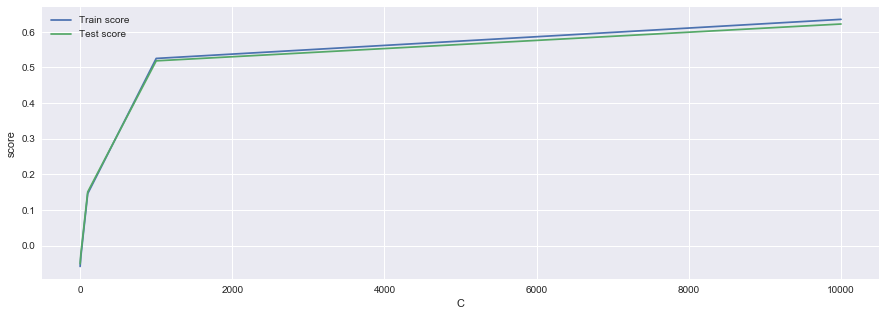

In [183]:
fig, ax = plt.subplots(figsize = (15,5))
x_axis=[0.1, 1, 10, 100, 1000, 10000]
plt.plot(x_axis, train_svr, label = 'Train score')
plt.plot(x_axis, test_svr, label = 'Test score')
plt.grid(True)
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
#plt.xticks(range(len(index_svr)), index_svr, rotation = 90)
plt.show()

### Running Linear Kernel with best parameter:

In [181]:
Best_param_Linear_SVR =format(grid_search_LinearKer.best_params_)
Best_score_Linear_SVR = format(grid_search_LinearKer.best_score_)

Linear_SVR_best=SVR(kernel = 'linear', C = 10000)
Linear_SVR_best.fit(X_train,y_train)
train_score_Linear_SVR=round(Linear_SVR_best.score(X_train, y_train),2)
test_score_Linear_SVR=round(Linear_SVR_best.score(X_test, y_test),2)

In [182]:
print("Train Score with best parameter:{}".format(train_score_Linear_SVR))
print("Test Score with best parameter:{}".format(test_score_Linear_SVR))

Train Score with best parameter:0.64
Test Score with best parameter:0.62


### Writing the results to the CSV file

In [184]:
f = open('result-house_price.csv','a')
line = 'SVR(kernel = Linear) ,' + str(Best_param_Linear_SVR)+ ',' + str(train_score_Linear_SVR) + ',' + str(test_score_Linear_SVR) + ',' + str(Best_score_Linear_SVR)+ '\n'
f.write(line)
f.close()

### SVR Linear Kernel Results:
* The SVR Linear Kernel has low Train, Test and CV scores but the model is generalizing well.

## SVR rbf Kernel

In [205]:
param_grid = {'C': [1000, 10000],
              'gamma': [0.01,0.1]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [1000, 10000], 'gamma': [0.01, 0.1]}


In [206]:
grid_search_rbf_Kernel = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, return_train_score=True)
grid_search_rbf_Kernel.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000, 10000], 'gamma': [0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [207]:
print("Best parameters: {}".format(grid_search_rbf_Kernel.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf_Kernel.best_score_))

Best parameters: {'C': 10000, 'gamma': 0.1}
Best cross-validation score: 0.51


In [208]:
train_svr_rbf = []
test_svr_rbf = []
for C in [1000, 10000]:
    #create the model
    svr = SVR(kernel = 'rbf', C = C, gamma = 0.1)
    #train the model
    svr.fit(X_train, y_train)
    #evaluate the model
    train_svr_rbf.append(svr.score(X_train, y_train))
    test_svr_rbf.append(svr.score(X_test, y_test))

In [209]:
print("Train Score for diff C and Gamma=0.1:{}".format(train_svr_rbf))
print("Test Score for diff C and Gamma=0.1:{}".format(test_svr_rbf))

Train Score for diff C and Gamma=0.1:[0.21172671043996893, 0.5463732330572924]
Test Score for diff C and Gamma=0.1:[0.2184453823302297, 0.54484891876895]


Text(0.5, 1.0, 'Score for diff C and Gamma=0.1')

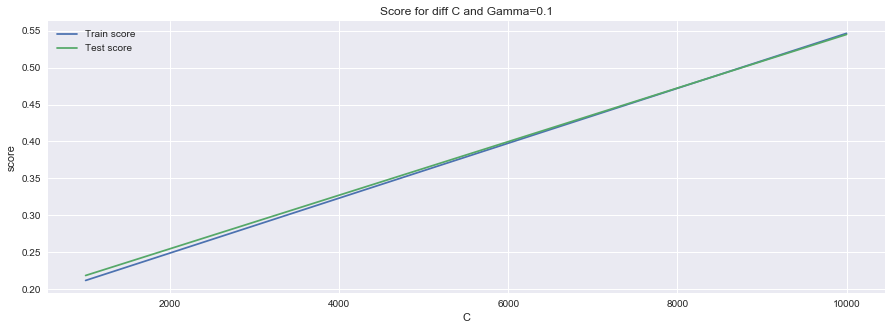

In [210]:
fig, ax = plt.subplots(figsize = (15,5))
x_axis=[1000, 10000]
plt.plot(x_axis, train_svr_rbf, label = 'Train score')
plt.plot(x_axis, test_svr_rbf, label = 'Test score')
plt.grid(True)
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.title('Score for diff C and Gamma=0.1')

### Running rbf kernel with best Parameter

In [212]:
Best_param_rbf_Kernel =format(grid_search_rbf_Kernel.best_params_)
Best_score_rbf_Kernel = format(grid_search_rbf_Kernel.best_score_)

RBF_SVR_best=SVR(kernel = 'rbf', C = 10000, gamma = 0.1)
RBF_SVR_best.fit(X_train,y_train)
train_score_rbf_Kernel=round(RBF_SVR_best.score(X_train, y_train),2)
test_score_rbf_Kernel=round(RBF_SVR_best.score(X_test, y_test),2)

In [213]:
print("Train Score with best parameter:{}".format(train_score_rbf_Kernel))
print("Test Score with best parameter:{}".format(test_score_rbf_Kernel))

Train Score with best parameter:0.55
Test Score with best parameter:0.54


### Writing Results to a file:

In [214]:
f = open('result-house_price.csv','a')
line = 'SVR(kernel = rbf) ,' + str(Best_param_rbf_Kernel)+ ',' + str(train_score_rbf_Kernel) + ',' + str(test_score_rbf_Kernel) + ',' + str(Best_score_rbf_Kernel)+ '\n'
f.write(line)
f.close()

### RBF Kernel Results:
* The Scores of the Training, Test and CV is not good

## SVR Poly Kernel

In [215]:
parameters = {'C':[10,100],'gamma': [10,100], 'degree' : [1,2]}
parameters

{'C': [10, 100], 'gamma': [10, 100], 'degree': [1, 2]}

In [216]:
svr_polygrid = GridSearchCV(SVR(kernel='poly'), parameters, cv = 3, scoring = 'r2',return_train_score=True)
svr_polygrid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 100], 'degree': [1, 2], 'gamma': [10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [217]:
print("Best parameters: {}".format(svr_polygrid.best_params_))
print("Best cross-validation score: {:.2f}".format(svr_polygrid.best_score_))

Best parameters: {'C': 100, 'degree': 2, 'gamma': 100}
Best cross-validation score: 0.81


In [218]:
train_svr_poly = []
test_svr_poly = []
for C in [10, 100]:
    #create the model
    svr = SVR(kernel = 'poly', C = C, gamma = 100,degree=2)
    #train the model
    svr.fit(X_train, y_train)
    #evaluate the model
    train_svr_poly.append(svr.score(X_train, y_train))
    test_svr_poly.append(svr.score(X_test, y_test))

In [219]:
print("Train Score for diff C and Gamma=100 and degree=2:{}".format(train_svr_poly))
print("Test Score for diff C and Gamma=100 and degree=2:{}".format(test_svr_poly))

Train Score for diff C and Gamma=100 and degree=2:[0.8105468123574008, 0.823484714040674]
Test Score for diff C and Gamma=100 and degree=2:[0.7802140484290139, 0.7919257073583834]


Text(0.5, 1.0, 'Score for diff C and Gamma=100 and degree=2')

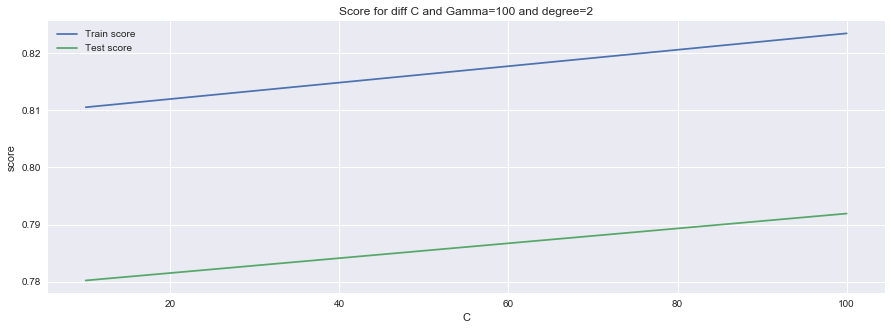

In [220]:
fig, ax = plt.subplots(figsize = (15,5))
x_axis=[10, 100]
plt.plot(x_axis, train_svr_poly, label = 'Train score')
plt.plot(x_axis, test_svr_poly, label = 'Test score')
plt.grid(True)
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.title('Score for diff C and Gamma=100 and degree=2')

### Running Poly kernel with best Parameter

In [221]:
Best_param_poly_Kernel =format(svr_polygrid.best_params_)
Best_score_poly_Kernel = format(svr_polygrid.best_score_)

Poly_SVR_best=SVR(kernel = 'poly', C = 100, gamma = 100,degree=2)
Poly_SVR_best.fit(X_train,y_train)
train_score_poly_Kernel=round(Poly_SVR_best.score(X_train, y_train),2)
test_score_poly_Kernel=round(Poly_SVR_best.score(X_test, y_test),2)

In [222]:
print("Train Score with best parameter:{}".format(train_score_poly_Kernel))
print("Test Score with best parameter:{}".format(test_score_poly_Kernel))

Train Score with best parameter:0.82
Test Score with best parameter:0.79


### Writing the results to the CSV file

In [223]:
f = open('result-house_price.csv','a')
line = 'SVR(kernel = poly) ,' + str(Best_param_poly_Kernel)+ ',' + str(train_score_poly_Kernel) + ',' + str(test_score_poly_Kernel) + ',' + str(Best_score_poly_Kernel)+ '\n'
f.write(line)
f.close()

### Poly Kernel results:
* Poly kernel with parameter of {'C': 100 'degree': 2 'gamma': 100} has the train and test score of 0.82 and 0.79 respectively

### Evaluation Metric used: R2 score

### R2 score explains the amount of variability in the model. High R2 score means it explains majority of the Variance in the data and hence the model is good

### Regression Model Evaluation:

In [63]:
Regress_part = 'result-house_price.csv'
Regress_result_df=pd.read_csv(Regress_part)
Regress_result_df.index=Regress_result_df['Model name']

In [64]:
Regress_result_df

,Model name,Best Parameters,Train Score,Test Score,Best Cross-Validation score
Model name,,,,,
Linear Regression,Linear Regression,NaN,0.700000,-1.600000e+19,0.697445
Ridge Regression,Ridge Regression,{'alpha': 1},0.706397,6.900000e-01,0.699878
Lasso Regression,Lasso Regression,{'alpha': 10},0.710000,6.900000e-01,0.699765
Kneighbours Regression,Kneighbours Regression,{'n_neighbors': 4},0.850000,7.200000e-01,0.719469
LinearSVR,LinearSVR,{'C': 10000},0.630000,6.200000e-01,0.631190
SVR(kernel = Linear),SVR(kernel = Linear),{'C': 10000},0.640000,6.200000e-01,0.631993
SVR(kernel = rbf),SVR(kernel = rbf),"{'C': 10000 , 'gamma': 0.1}",0.550000,5.400000e-01,0.511975
SVR(kernel = poly),SVR(kernel = poly),"{'C': 100, 'degree': 2, 'gamma': 100}",0.820000,7.900000e-01,0.810824


## Best Model: SVR Poly kernel

* We can see that the best regression which we can use is SVR(kernal=poly). 
* We can see that that for the paticular parameter of{'C': 100 'degree': 2 'gamma': 100}  its train and test score are 0.82 and 0.79 which is very good when compared with all other models.

### Prediction using best model:
* SVR poly kernel with parameter of C:100, Gamma:100 and degree:2 is used for predicting the price of the house

In [241]:
svr_poly_pred_train = Poly_SVR_best.predict(X_train)
svr_poly_pred_test = Poly_SVR_best.predict(X_test)

In [242]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [243]:
print('Test R2 score:{}'.format(r2_score(y_train,svr_poly_pred_train)))
print('Training R2 score:{}'.format(r2_score(y_test,svr_poly_pred_test)))

Test R2 score:0.823484714040674
Training R2 score:0.7919257073583833
